In [45]:
!pip install PyPortfolioOpt

In [46]:
from itertools import combinations
from pypfopt import expected_returns, risk_models
from pypfopt.efficient_frontier import EfficientFrontier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import requests
import scipy as sc
import scipy.optimize as sc
import seaborn as sns


In [47]:

csv_url = 'https://drive.google.com/uc?id=1RSWblpatnnL4xawZZGbQg0CEfRBU9I_6'
df = pd.read_csv(csv_url)


In [48]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df = df.sort_values(by='Date')
df.set_index('Date', inplace=True)
result_df = pd.DataFrame(columns=df.columns)


for column in df.columns:
    # Tính toán phần trăm thay đổi giá trị của từng mã cổ phiếu giữa các tháng
    change_percentage = df[column].pct_change()
    result_df[column] = change_percentage

In [49]:
# Lấy dữ liệu của các mã cổ phiếu cụ thể
stocks_to_compare = ['FPT', 'HPG']

data_of_stocks = result_df[stocks_to_compare]

print("Dữ liệu của các mã cổ phiếu:")
print(data_of_stocks.to_string())



Dữ liệu của các mã cổ phiếu:
                 FPT       HPG
Date                          
2019-03-01       NaN       NaN
2019-04-01  0.026905 -0.067153
2019-05-02  0.088427  0.064165
2019-06-03 -0.020412 -0.073527
2019-07-01  0.082760 -0.050756
2019-08-01  0.026539 -0.017394
2019-09-03  0.131934 -0.042032
2019-10-01  0.089385  0.011548
2019-11-01  0.000000  0.000000
2019-12-02 -0.066668  0.047940
2020-01-02  0.073259  0.045757
2020-02-03 -0.121161  0.022912
2020-03-02  0.081556 -0.091652
2020-04-01 -0.240574 -0.226457
2020-05-04  0.193850  0.217397
2020-06-01  0.120476  0.316665
2020-07-01 -0.043480 -0.009042
2020-08-03 -0.006494  0.021592
2020-09-01  0.110353  0.082973
2020-10-01  0.018038  0.088711
2020-11-02  0.017715  0.133331
2020-12-01  0.067698  0.163399
2021-01-04  0.090582  0.188204
2021-02-01  0.054817 -0.093382
2021-03-01  0.226771  0.204697
2021-04-01  0.023107  0.049783
2021-05-04  0.040150  0.232989
2021-06-01  0.220709  0.262368
2021-07-01  0.020665 -0.048650
2021-08-02

In [50]:
# Tính phương sai và độ lệch chuẩn của các mã cổ phiếu
variance = data_of_stocks.var() * 100
std_deviation = data_of_stocks.std() * 100

# Tính lợi nhuận kỳ vọng của các mã cổ phiếu
expected_return = data_of_stocks.mean() * 100

result_df = pd.concat([expected_return, variance, std_deviation], axis=1)
result_df.columns = ["Expected Return", "Var", "Std"]

print("Thông tin về Expected Return, Var và Std của các mã cổ phiếu:")
print(result_df)


Thông tin về Expected Return, Var và Std của các mã cổ phiếu:
     Expected Return       Var        Std
FPT         3.300817  0.699706   8.364846
HPG         2.261192  1.400597  11.834682


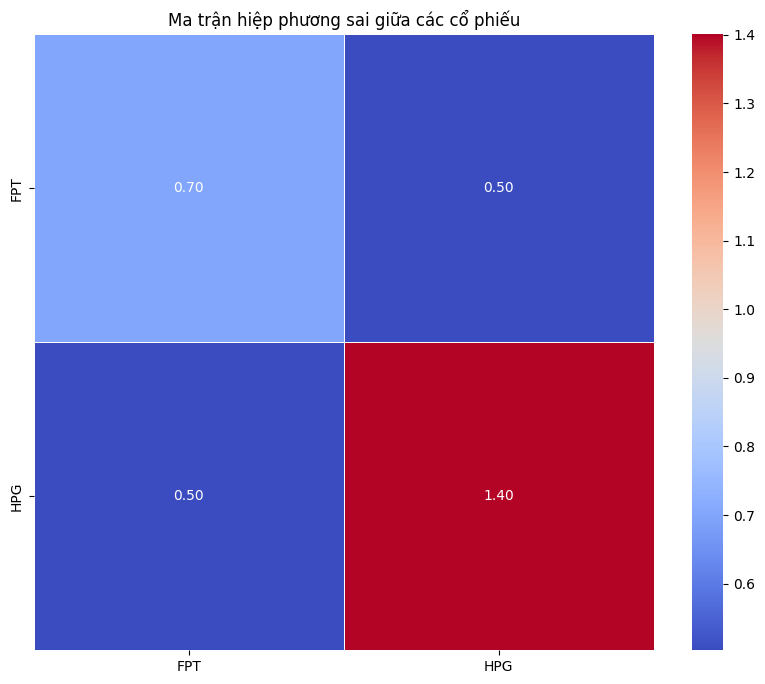

In [51]:
# Tính ma trận hiệp phương sai
covariance_matrix = data_of_stocks.cov() * 100  # Đổi thành phần trăm

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Ma trận hiệp phương sai giữa các cổ phiếu")
plt.show()


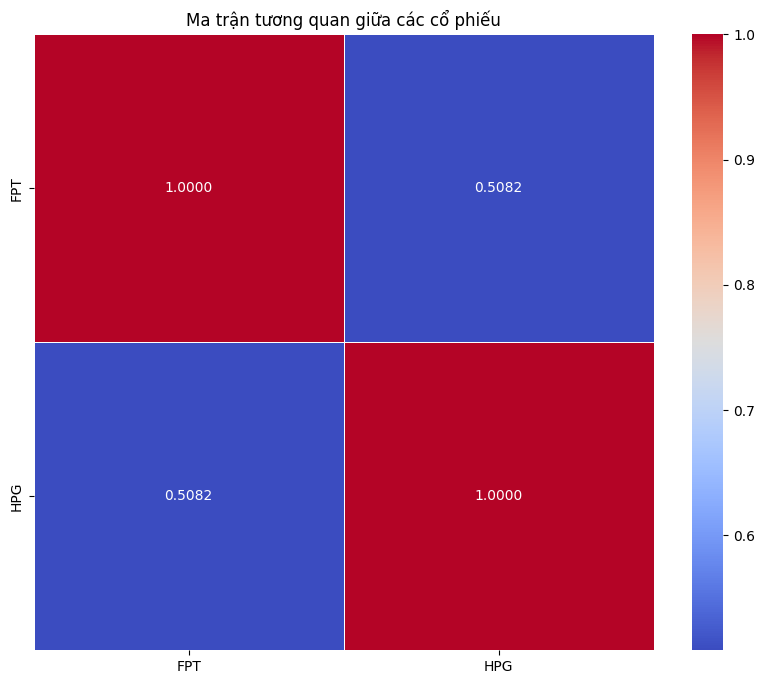

In [52]:
# Tạo ma trận tương quan từ ma trận hiệp phương sai
correlation_matrix = data_of_stocks.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".4f", cmap="coolwarm", linewidths=0.5)
plt.title("Ma trận tương quan giữa các cổ phiếu")
plt.show()


In [53]:
# Chọn các mã cổ phiếu muốn tính
selected_stocks = ['FPT', 'HPG']

# Tính Expect Return
expect_return_selected = data_of_stocks[selected_stocks].mean()

# Tính (Ri - mean_i)
ri_minus_mean_selected = data_of_stocks[selected_stocks].subtract(expect_return_selected)

print("(Ri - mean_i) của các mã cổ phiếu đã chọn trong 60 tháng là:")
print(ri_minus_mean_selected)

(Ri - mean_i) của các mã cổ phiếu đã chọn trong 60 tháng là:
                 FPT       HPG
Date                          
2019-03-01       NaN       NaN
2019-04-01 -0.006104 -0.089765
2019-05-02  0.055419  0.041554
2019-06-03 -0.053420 -0.096139
2019-07-01  0.049752 -0.073368
...              ...       ...
2023-11-01 -0.116699 -0.108490
2023-12-01  0.048959  0.100561
2024-01-02  0.004871 -0.002166
2024-02-01  0.008702 -0.008040
2024-03-01  0.076101  0.085108

[61 rows x 2 columns]


Trung bình tỷ suất sinh lời của 10 mã cổ phiếu trong 60 tháng là:
FPT    0.033008
HPG    0.022612
dtype: float64


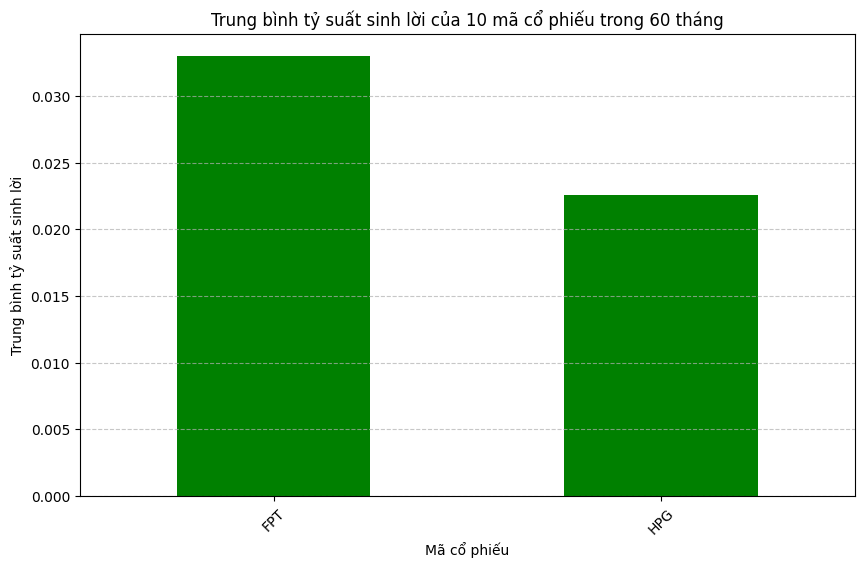

In [54]:
# Tính trung bình tỷ suất sinh lời của từng mã cổ phiếu
average_return_per_stock = data_of_stocks.mean()

print("Trung bình tỷ suất sinh lời của 10 mã cổ phiếu trong 60 tháng là:")
print(average_return_per_stock)

# Tính trung bình tỷ suất sinh lời của từng mã cổ phiếu
average_return_per_stock = data_of_stocks.mean()

# Định nghĩa màu sắc cho giá trị dương và âm
colors = ['red' if x < 0 else 'green' for x in average_return_per_stock]

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
average_return_per_stock.plot(kind='bar', color=colors)
plt.title('Trung bình tỷ suất sinh lời của 10 mã cổ phiếu trong 60 tháng')
plt.xlabel('Mã cổ phiếu')
plt.ylabel('Trung bình tỷ suất sinh lời')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


In [55]:
csv_url = 'https://drive.google.com/uc?id=1toduRkZH_j4qrq3ueawa9WwlaYGMx_V3'

df = pd.read_csv(csv_url)

# Lưu DataFrame vào tệp Excel
df.to_excel('Data.xlsx', index=False)


In [56]:
def main():
    # Nhập các giá trị từ người dùng
    w_fpt = float(input("Nhập trọng số của FPT (phần trăm): "))
    w_msn = float(input("Nhập trọng số của MSN (phần trăm): "))
    w_vcb = float(input("Nhập trọng số của VCB (phần trăm): "))

    # Lưu lại trọng số gốc để hiển thị biểu đồ
    global weights, labels  # Để có thể dùng ở cell khác
    weights = [w_fpt, w_msn, w_vcb]
    labels = ["FPT", "MSN", "VCB"]

    # Tính toán tổng trọng số
    total_weight = w_fpt + w_msn + w_vcb

    # Chuẩn hóa trọng số cho tính toán (nhưng giữ nguyên giá trị gốc)
    w_fpt /= total_weight
    w_msn /= total_weight
    w_vcb /= total_weight

    # Nhập các giá trị tài chính
    e_rp = float(input("Nhập E(rp) (lợi nhuận kỳ vọng): "))
    sigma_p = float(input("Nhập 𝞼p (độ lệch chuẩn): "))
    e_rc = float(input("Nhập E(rc): "))
    sigma_c = float(input("Nhập 𝞼c: "))
    rf = float(input("Nhập giá trị rf: "))
    U = float(input("Nhập giá trị U: "))

    # Tính toán Solver với function
    y = (e_rc - rf) / (e_rp - rf)
    y_percentage = y * 100
    one_minus_y_percentage = (1 - y) * 100

    # In ra kết quả
    print("\nKết quả:")
    print("w(FPT):\t{:.2f}%".format(weights[0]))  # Dùng giá trị gốc
    print("w(MSN):\t{:.2f}%".format(weights[1]))
    print("w(VCB):\t{:.2f}%".format(weights[2]))
    print("E(rp):\t{:.2f}%".format(e_rp))
    print("𝞼p:\t{:.2f}%".format(sigma_p))
    print("rf:\t{:.2f}%".format(rf))
    print("\nSolver with function")
    print("y:\t{:.2f}%".format(y_percentage))
    print("1-y:\t{:.2f}%".format(one_minus_y_percentage))
    print("\t100%")
    print("\nE(rc):\t{:.2f}%".format(e_rc))
    print("𝞼c:\t{:.2f}%".format(sigma_c))
    print("\nU:\t{:.2f}".format(U))

if __name__ == "__main__":
    main()

Nhập trọng số của FPT (phần trăm): 40
Nhập trọng số của MSN (phần trăm): 30
Nhập trọng số của VCB (phần trăm): 30
Nhập E(rp) (lợi nhuận kỳ vọng): 12
Nhập 𝞼p (độ lệch chuẩn): 8
Nhập E(rc): 10
Nhập 𝞼c: 6
Nhập giá trị rf: 4
Nhập giá trị U: 3

Kết quả:
w(FPT):	40.00%
w(MSN):	30.00%
w(VCB):	30.00%
E(rp):	12.00%
𝞼p:	8.00%
rf:	4.00%

Solver with function
y:	75.00%
1-y:	25.00%
	100%

E(rc):	10.00%
𝞼c:	6.00%

U:	3.00


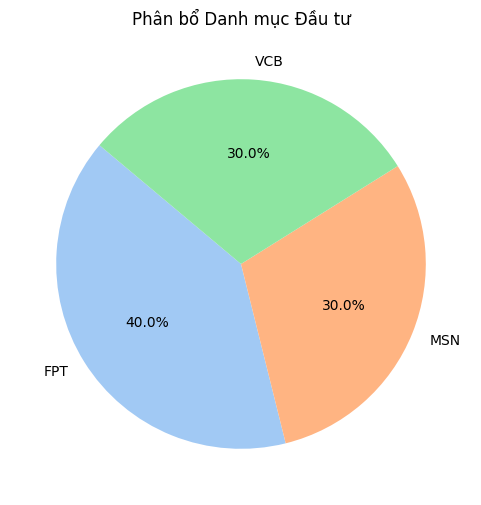

In [57]:
# Kiểm tra xem weights có tồn tại không
if "weights" in globals():
    plt.figure(figsize=(6, 6))
    colors = sns.color_palette("pastel")
    plt.pie(weights, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140)
    plt.title("Phân bổ Danh mục Đầu tư")
    plt.show()
else:
    print("⚠️ Chưa có dữ liệu! Hãy chạy cell nhập dữ liệu trước.")